In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/parthabhang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load dataset
df = pd.read_csv("IMDB Dataset.csv")
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production.  The filming te...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [3]:
# Preprocess Text
print(df.columns)
if 'review' not in df.columns or 'sentiment' not in df.columns:
    raise ValueError("Dataset must have 'review' and 'sentiment' columns.")
df['sentiment'] = df['sentiment'].map({'positive': 1, 'negative': 0})
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return " ".join(words)
df['cleaned_review'] = df['review'].apply(preprocess_text)
print(df[['review', 'cleaned_review']].head())

Index(['review', 'sentiment'], dtype='object')
                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production.  The filming te...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one reviewers mentioned watching oz episode yo...  
1  wonderful little production filming technique ...  
2  thought wonderful way spend time hot summer we...  
3  basically theres family little boy jake thinks...  
4  petter matteis love time money visually stunni...  


In [4]:
# Vectorize it to make the machine learn
vectorizer = TfidfVectorizer(max_features=5000)
x = vectorizer.fit_transform(df['cleaned_review'])
y = df['sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(f"Train size: {x_train.shape}, Test size: {x_test.shape}")

Train size: (40000, 5000), Test size: (10000, 5000)


In [5]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 3906245 stored elements and shape (50000, 5000)>
  Coords	Values
  (0, 3070)	0.02326700365899655
  (0, 3658)	0.08283052047653515
  (0, 2770)	0.07234840500884361
  (0, 4821)	0.08484016793272865
  (0, 3120)	0.4887730699857599
  (0, 1459)	0.12577907583362982
  (0, 4990)	0.05978698148546152
  (0, 2112)	0.09139753710252851
  (0, 3675)	0.09501442322871313
  (0, 1504)	0.06324980249123056
  (0, 1987)	0.06332293176068818
  (0, 1693)	0.07018206344038652
  (0, 4445)	0.04269812285596807
  (0, 4228)	0.18324204507513103
  (0, 3801)	0.04197568677856953
  (0, 4751)	0.25903874381183106
  (0, 3886)	0.052131460796928805
  (0, 4934)	0.129717731923448
  (0, 1881)	0.041575695791609545
  (0, 4600)	0.08023393106681398
  (0, 3944)	0.1334552272535467
  (0, 3430)	0.0866957380153475
  (0, 1326)	0.08068032655225049
  (0, 3897)	0.059793380616342845
  (0, 1994)	0.09322598064728431
  :	:
  (49999, 4598)	0.10689640456505514
  (49999, 685)	0.1271553273329810

In [6]:
print(y)

0        1
1        1
2        1
3        0
4        1
        ..
49995    1
49996    0
49997    0
49998    0
49999    0
Name: sentiment, Length: 50000, dtype: int64


In [7]:
# Logistic Regression
log_reg = LogisticRegression()
model1=log_reg.fit(x_train, y_train)
y_pred_log = model1.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)

print(f"Logistic Regression - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


Logistic Regression - Accuracy: 0.8878, Precision: 0.8786, Recall: 0.9020


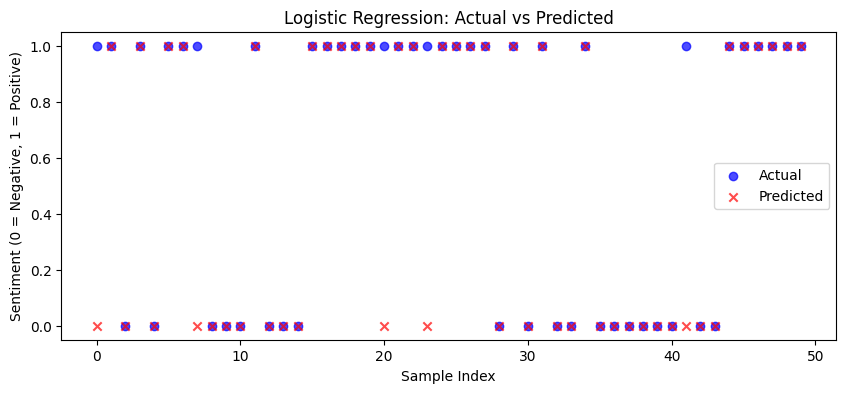

In [8]:
# Plotting the results
plt.figure(figsize=(10, 4))
plt.scatter(range(50), y_test.values[:50], label="Actual", alpha=0.7, color='blue', marker='o')
plt.scatter(range(50), y_pred_log[:50], label="Predicted", alpha=0.7, color='red', marker='x')
plt.title("Logistic Regression: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Sentiment (0 = Negative, 1 = Positive)")
plt.legend()
plt.show()

In [9]:
# Naive Bayes (Multinomial)
nb = MultinomialNB()
model2=nb.fit(x_train, y_train)
y_pred_nb = model2.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)

print(f"Naive Bayes - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")


Naive Bayes - Accuracy: 0.8494, Precision: 0.8492, Recall: 0.8526


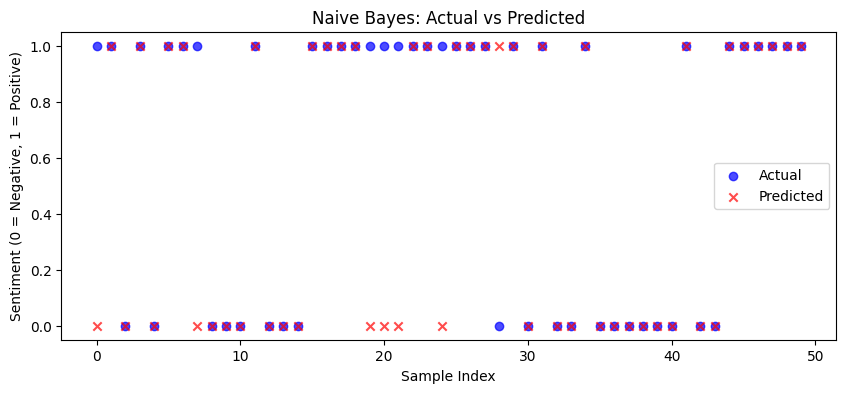

In [10]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.scatter(range(50), y_test.values[:50], label="Actual", alpha=0.7, color='blue', marker='o')
plt.scatter(range(50), y_pred_nb[:50], label="Predicted", alpha=0.7, color='red', marker='x')
plt.title("Naive Bayes: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Sentiment (0 = Negative, 1 = Positive)")
plt.legend()
plt.show()

In [11]:
# Logistic Regression Hyper Parameter Tuning
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100]
}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='accuracy', n_jobs=-1)
model3 = log_reg_grid.fit(x_train, y_train)
log_reg_pred_ht=model3.predict(x_test)
accuracy = accuracy_score(y_test, log_reg_pred_ht)
precision = precision_score(y_test, log_reg_pred_ht)
recall = recall_score(y_test, log_reg_pred_ht)
print(f"Logistic Regression HyperParameter Tuned - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
print(f"Best Logistic Regression Params: {model3.best_params_}")
print(f"Best Logistic Regression Accuracy: {model3.best_score_:.4f}")

Logistic Regression HyperParameter Tuned - Accuracy: 0.8878, Precision: 0.8786, Recall: 0.9020
Best Logistic Regression Params: {'C': 1}
Best Logistic Regression Accuracy: 0.8857


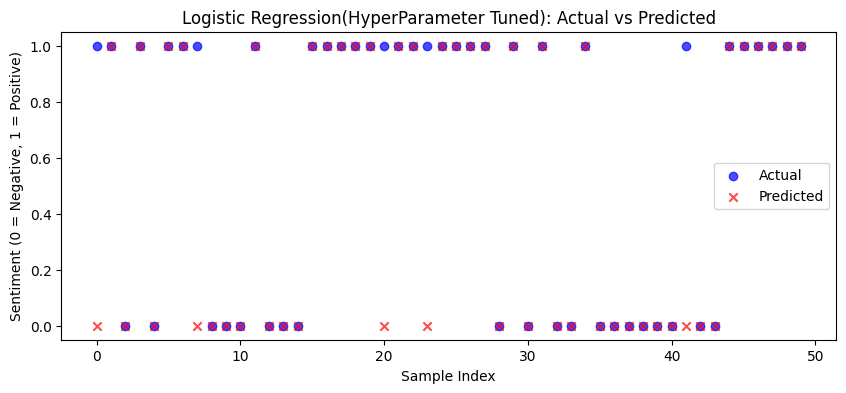

In [12]:
# Plot the results
plt.figure(figsize=(10, 4))
plt.scatter(range(50), y_test.values[:50], label="Actual", alpha=0.7, color='blue', marker='o')
plt.scatter(range(50), log_reg_pred_ht[:50], label="Predicted", alpha=0.7, color='red', marker='x')
plt.title("Logistic Regression(HyperParameter Tuned): Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Sentiment (0 = Negative, 1 = Positive)")
plt.legend()
plt.show()

In [13]:
# Naive Bayes Hyper Parameter Tuning

nb_params = {
    'alpha': [0.01, 0.1, 1, 10]
}
nb = MultinomialNB()
nb_grid = GridSearchCV(nb, nb_params, cv=5, scoring='accuracy', n_jobs=-1)
model4 = nb_grid.fit(x_train, y_train)
nb_pred_ht=model4.predict(x_test)
accuracy = accuracy_score(y_test, nb_pred_ht)
precision = precision_score(y_test, nb_pred_ht)
recall = recall_score(y_test, nb_pred_ht)
print(f"Naive Bayes Hyperparameter Tuned - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
print(f"Best Naive Bayes Params: {model4.best_params_}")
print(f"Best Naive Bayes Accuracy: {model4.best_score_:.4f}")

Naive Bayes Hyperparameter Tuned - Accuracy: 0.8526, Precision: 0.8625, Recall: 0.8416
Best Naive Bayes Params: {'alpha': 10}
Best Naive Bayes Accuracy: 0.8535


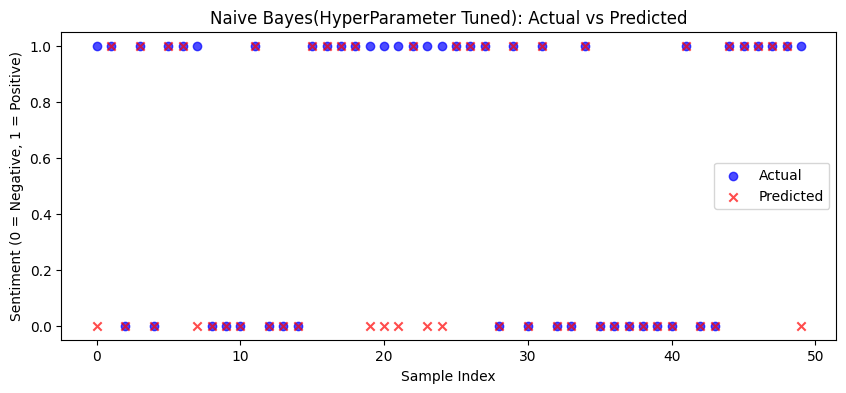

In [14]:
# Plot the results

plt.figure(figsize=(10, 4))
plt.scatter(range(50), y_test.values[:50], label="Actual", alpha=0.7, color='blue', marker='o')
plt.scatter(range(50), nb_pred_ht[:50], label="Predicted", alpha=0.7, color='red', marker='x')
plt.title("Naive Bayes(HyperParameter Tuned): Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("Sentiment (0 = Negative, 1 = Positive)")
plt.legend()
plt.show()

In [17]:
# Test the model
def classify_review(review):
    cleaned_review = preprocess_text(review)
    transformed_review = vectorizer.transform([cleaned_review])
    log_reg_pred = model1.predict(transformed_review)[0]
    nb_pred = model2.predict(transformed_review)[0]
    log_reg_ht_pred = model3.predict(transformed_review)[0]
    nb_ht_pred = model4.predict(transformed_review)[0]
    sentiment_map = {0: "Negative", 1: "Positive"}
    print("\n--- Sentiment Classification Results ---")
    print(f"Logistic Regression: {sentiment_map[log_reg_pred]}")
    print(f"Naïve Bayes: {sentiment_map[nb_pred]}")
    print(f"Logistic Regression (Hyperparameter Tuned): {sentiment_map[log_reg_ht_pred]}")
    print(f"Naïve Bayes (Hyperparameter Tuned): {sentiment_map[nb_ht_pred]}")
user_review = input("Enter a review: ")
print(f"Review: {user_review}")
classify_review(user_review)

Review: It was wonderfull. I felt exciting.

--- Sentiment Classification Results ---
Logistic Regression: Positive
Naïve Bayes: Positive
Logistic Regression (Hyperparameter Tuned): Positive
Naïve Bayes (Hyperparameter Tuned): Positive
